## 가설 : 거주 인구가 많을 수록 버스 운행 노선 수 또한 많이 필요할 것이다.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

In [9]:
bus = pd.read_csv("df_seoul_bus_station.csv", sep=",")

bus

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040
5,광진구,269,41,2749448,2753411,118.352546,118.523137
6,구로구,486,79,4942197,4730992,119.235615,114.140076
7,금천구,345,58,3776658,3581930,123.098370,116.751304
8,노원구,514,57,4353295,4292724,88.476211,87.245168
9,도봉구,359,46,3304305,3211421,106.859356,103.855540


In [10]:
people = pd.read_csv("seoul_people.csv", sep=",")
people

,자치구,인구
0,종로구,153684
1,중구,131450
2,용산구,236518
3,성동구,291609
4,광진구,353110
5,동대문구,352592
6,중랑구,393600
7,성북구,442680
8,강북구,300824
9,도봉구,318100


In [11]:
bus_people = pd.merge(bus, people, on = '자치구')

In [12]:
bus_people

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,인구
0,강남구,499,91,8030483,7569213,128.767927,121.371512,537338
1,강동구,369,21,2890053,2830506,99.161194,97.118065,465097
2,강북구,413,67,4825181,4671783,133.020373,128.791504,300824
3,강서구,566,49,4681083,4652828,88.119480,87.587591,578426
4,관악구,466,86,7655819,7792476,154.753674,157.516040,500336
5,광진구,269,41,2749448,2753411,118.352546,118.523137,353110
6,구로구,486,79,4942197,4730992,119.235615,114.140076,419984
7,금천구,345,58,3776658,3581930,123.098370,116.751304,244901
8,노원구,514,57,4353295,4292724,88.476211,87.245168,514445
9,도봉구,359,46,3304305,3211421,106.859356,103.855540,318100


In [13]:
bus_people.corr()

,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,인구
정류장수,1.000000,0.258798,0.566681,0.578479,-0.135318,-0.099146,0.566615
노선수,0.258798,1.000000,0.665488,0.652642,0.493541,0.470440,-0.281536
승차총승객수,0.566681,0.665488,1.000000,0.996610,0.538720,0.547384,0.364433
하차총승객수,0.578479,0.652642,0.996610,1.000000,0.534826,0.555137,0.388119
승차평균승객수,-0.135318,0.493541,0.538720,0.534826,1.000000,0.989288,-0.269854
하차평균승객수,-0.099146,0.470440,0.547384,0.555137,0.989288,1.000000,-0.207643
인구,0.566615,-0.281536,0.364433,0.388119,-0.269854,-0.207643,1.000000


In [18]:
plt.rc("font", family = "Malgun Gothic")

sns.set(font = "Malgun Gothic",
       rc={"axes.unicode_minus":False},
       style = "darkgrid")

<AxesSubplot:>

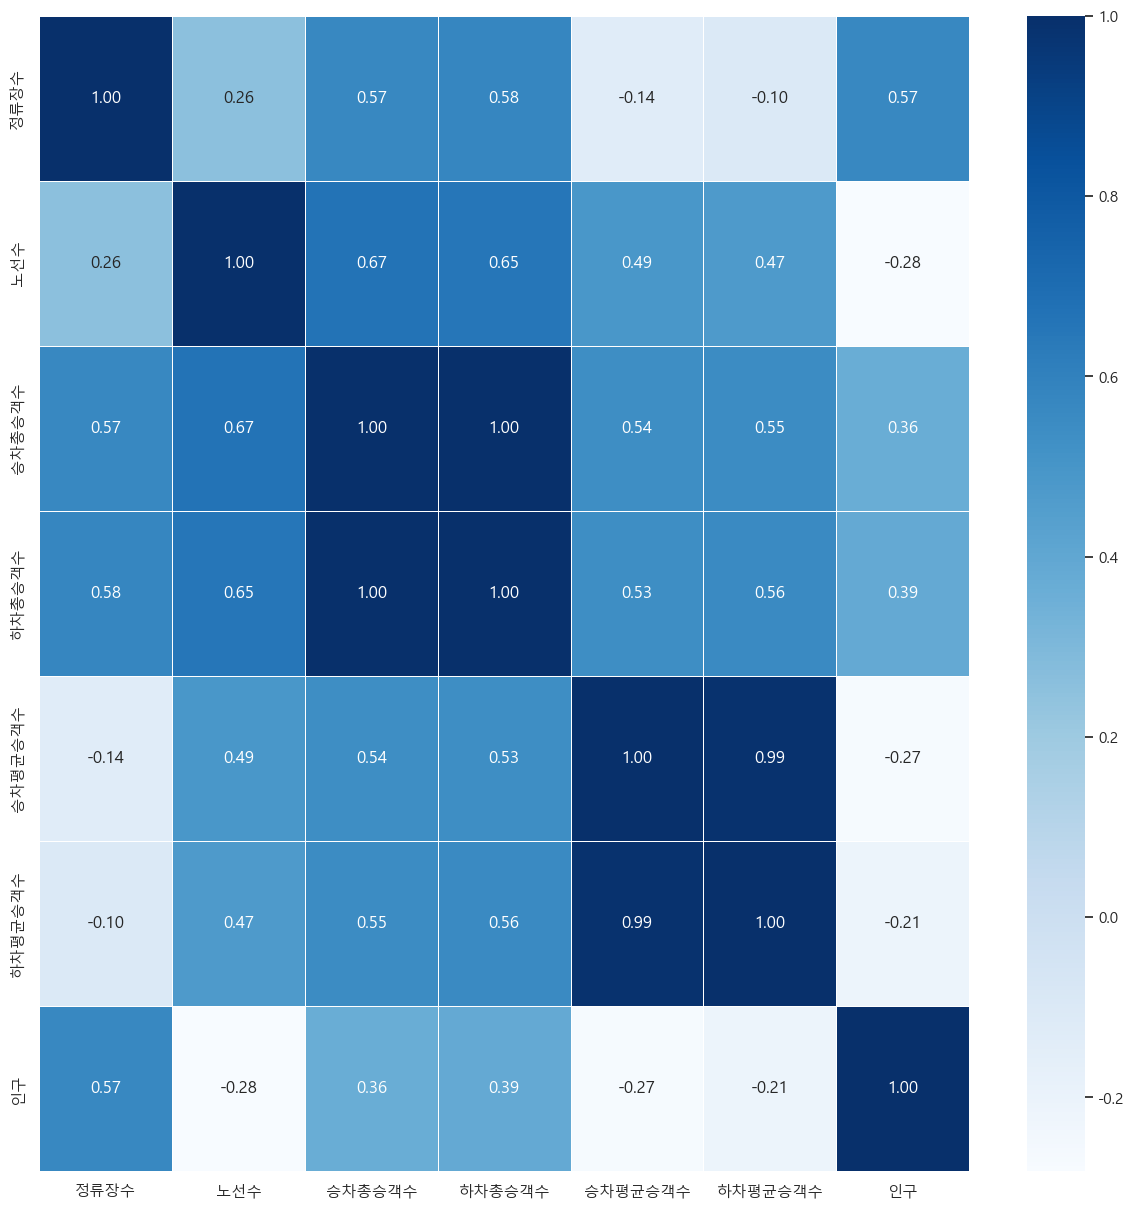

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(data = bus_people.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [24]:
test_stat, p_val = stats.shapiro(bus_people.인구)
print("Test-statistics : {0}, bus_people p-value : {1}".format(test_stat, p_val))

Test-statistics : 0.9902743697166443, bus_people p-value : 0.9962607026100159


In [25]:
test_stat, p_val = stats.shapiro(bus_people.정류장수)
print("Test-statistics : {0}, bus_line p-value : {1}".format(test_stat, p_val))

Test-statistics : 0.9453245401382446, bus_line p-value : 0.19629020988941193


In [26]:
stats.ttest_ind(bus_people['정류장수'], bus_people['인구'])

Ttest_indResult(statistic=-15.43520607525848, pvalue=3.0566075529328425e-20)

In [31]:
bus_people.sort_values(by=['정류장수', '인구'], ascending=[True, False], inplace = True)


In [32]:
bus_people

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,인구
23,중구,178,103,3776675,3598932,121.020124,115.324511,131450
5,광진구,269,41,2749448,2753411,118.352546,118.523137,353110
10,동대문구,306,73,5240565,5115379,131.841430,128.692017,352592
18,양천구,319,56,4009172,3851173,97.627526,93.780086,449378
20,용산구,323,67,4189977,4086474,137.891694,134.485421,236518
7,금천구,345,58,3776658,3581930,123.098370,116.751304,244901
22,종로구,349,106,5468935,5205394,131.889620,125.534028,153684
9,도봉구,359,46,3304305,3211421,106.859356,103.855540,318100
1,강동구,369,21,2890053,2830506,99.161194,97.118065,465097
24,중랑구,380,48,3792541,3740923,87.403863,86.214261,393600


In [33]:
bus_people = bus_people.reset_index(drop=True)

In [34]:
bus_people

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,인구
0,중구,178,103,3776675,3598932,121.020124,115.324511,131450
1,광진구,269,41,2749448,2753411,118.352546,118.523137,353110
2,동대문구,306,73,5240565,5115379,131.841430,128.692017,352592
3,양천구,319,56,4009172,3851173,97.627526,93.780086,449378
4,용산구,323,67,4189977,4086474,137.891694,134.485421,236518
5,금천구,345,58,3776658,3581930,123.098370,116.751304,244901
6,종로구,349,106,5468935,5205394,131.889620,125.534028,153684
7,도봉구,359,46,3304305,3211421,106.859356,103.855540,318100
8,강동구,369,21,2890053,2830506,99.161194,97.118065,465097
9,중랑구,380,48,3792541,3740923,87.403863,86.214261,393600


In [39]:
bus_people['랭크'] = list(range(1,26))

In [40]:
bus_people

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,인구,랭크
0,중구,178,103,3776675,3598932,121.020124,115.324511,131450,1
1,광진구,269,41,2749448,2753411,118.352546,118.523137,353110,2
2,동대문구,306,73,5240565,5115379,131.841430,128.692017,352592,3
3,양천구,319,56,4009172,3851173,97.627526,93.780086,449378,4
4,용산구,323,67,4189977,4086474,137.891694,134.485421,236518,5
5,금천구,345,58,3776658,3581930,123.098370,116.751304,244901,6
6,종로구,349,106,5468935,5205394,131.889620,125.534028,153684,7
7,도봉구,359,46,3304305,3211421,106.859356,103.855540,318100,8
8,강동구,369,21,2890053,2830506,99.161194,97.118065,465097,9
9,중랑구,380,48,3792541,3740923,87.403863,86.214261,393600,10
